In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns

In [37]:
df = pd.read_csv("temporal.csv")
chiplets = [4]
Bandwidth = ['160GB/s', '300GB/s', '600GB/s', '900GB/s', '1200GB/s', '1400GB/s', '1800GB/s', '2048GB/s']
NVLinks = ['NVLink1', 'NVLink2', 'NVLink3', 'NVLink4', 'NVLink5', 'NVLink6', 'NVLink7', 'NVLink8']
bandwidth_converter = {'NVLink1': '160GB/s', 'NVLink2': '300GB/s', 'NVLink3': '600GB/s', 'NVLink4': '900GB/s', 'NVLink5': '1200GB/s', 'NVLink6': '1400GB/s', 'NVLink7': '1800GB/s', 'NVLink8': '2048GB/s'}
suites = {
    'SDK': {'conjugate-gradient': [2, 3],
            #'fdtd3d': [2],
           },
    'cutlass': {'splitk-gemm': [2],
               },
    'deepbench': {'rnn': [4, 8, 10],
                 },
    'pannotia': {'color-max': [1],
                 'color-maxmin': [2, 3, 4, 5, 6, 7, 8, 9, 10],
                 'pagerank-spmv': [2, 3, 5, 7, 9],
                 'sssp': [3, 6, 9],
                },
    'parboil': {'mri-gridding': [1],
                'spmv': [1],
               },
    #'polybench': {'syr2k': [1],
    #              },
    'rodinia': {'cfd': [5],
                'gaussian': [2, 4, 6],
                'hybridsort': [4, 6, 7, 8, 9, 10],
                'bfs': [7],
               },
    'shoc': {'FFT': [3],
            },
    'mlperf': {'infer-ssd-resnet50': [44, 46, 47],
               'infer-3dunet': [33, 40, 41, 46, 47]
              },
'UVM': {'lr': [1, 3, 6, 8, 11, 13],
           },
}
df.head()

,suite,benchmark,kernel,CTA,instruction,chiplet,bandwidth,core cycle,IAT_avg,VOL_avg,...,LEN_kur,IAT_med,VOL_med,LEN_med,IAT_mod,VOL_mod,LEN_mod,IAT_cov,VOL_cov,LEN_cov
0,SDK,conjugate gradient,2.0,1536.0,168049118.0,4.0,160GB/s,325862.0,22.994,457.192,...,3027.335,12.0,40.0,4.0,9.0,32.0,4.0,0.061,0.065,0.205
1,SDK,conjugate gradient,2.0,1536.0,168049118.0,4.0,300GB/s,184013.0,18.294,655.006,...,1943.620,10.0,64.0,5.0,7.0,32.0,4.0,0.065,0.050,0.172
2,SDK,conjugate gradient,2.0,1536.0,168049118.0,4.0,600GB/s,115702.0,17.448,1079.286,...,986.045,10.0,120.0,5.0,7.0,40.0,4.0,0.261,0.057,0.191
3,SDK,conjugate gradient,2.0,1536.0,168049118.0,4.0,900GB/s,89891.0,23.272,1786.082,...,2038.508,11.0,120.0,6.0,6.0,32.0,4.0,0.178,0.045,0.130
4,SDK,conjugate gradient,2.0,1536.0,168049118.0,4.0,1200GB/s,78969.0,20.599,1742.237,...,2598.129,11.0,120.0,5.0,6.0,40.0,1.0,0.135,0.033,0.098


In [4]:
def weighted_arithmetic_mean(data, weight) -> float:
    total_weight = weight.sum()
    avg = (data * weight).sum() / total_weight
    return avg

## Analysis of Inter Arrival Time

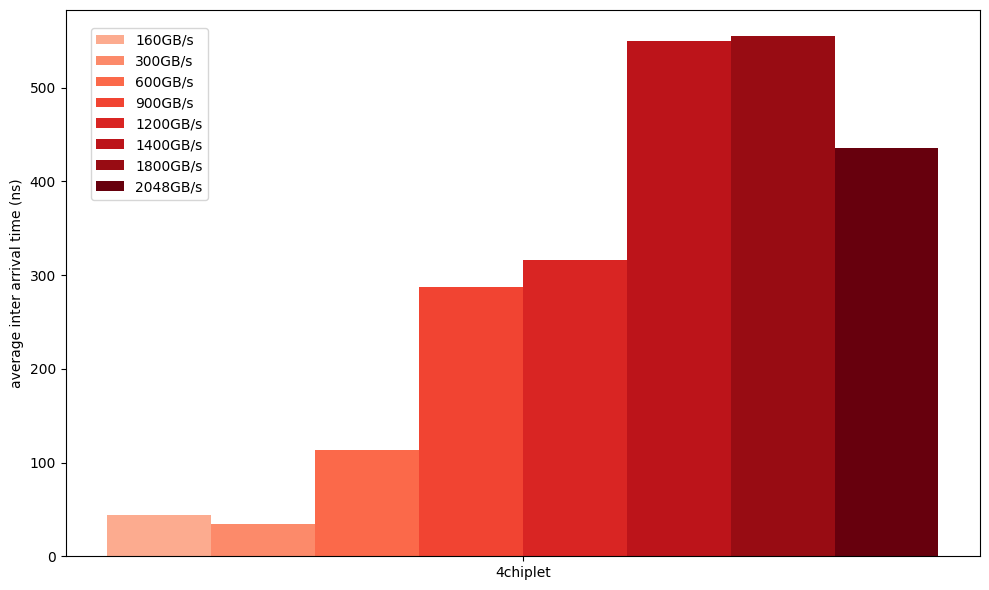

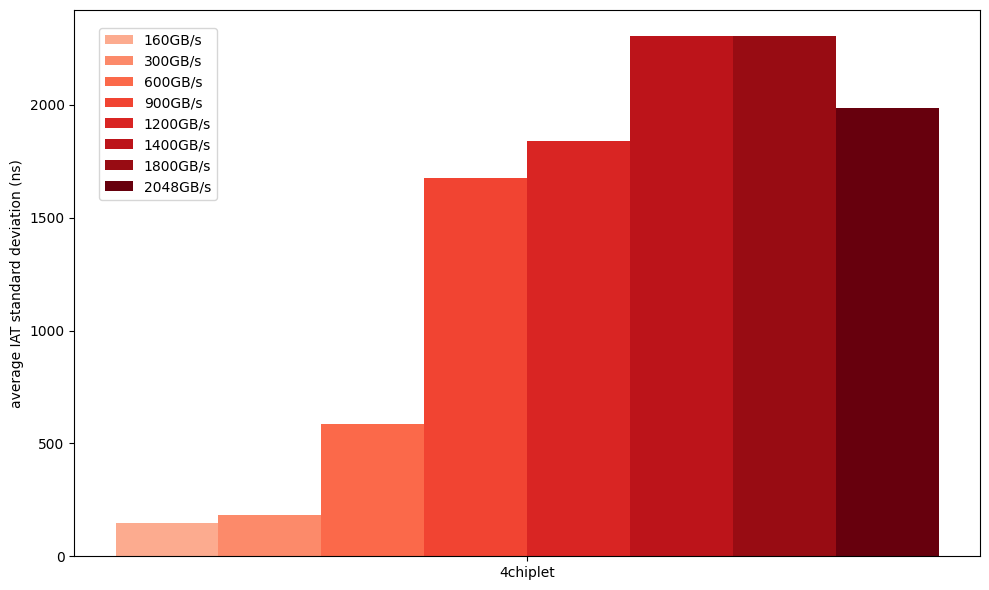

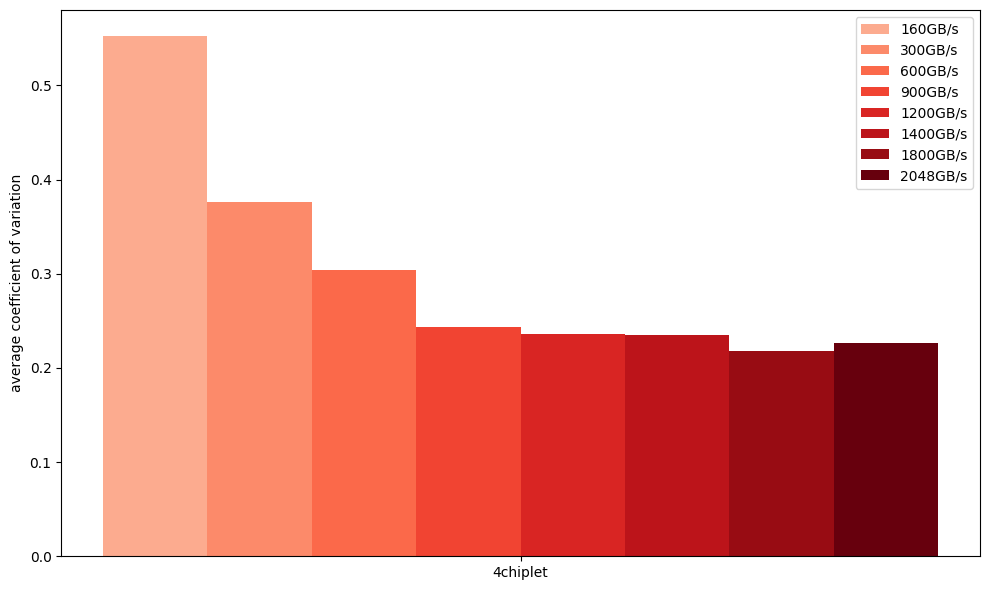

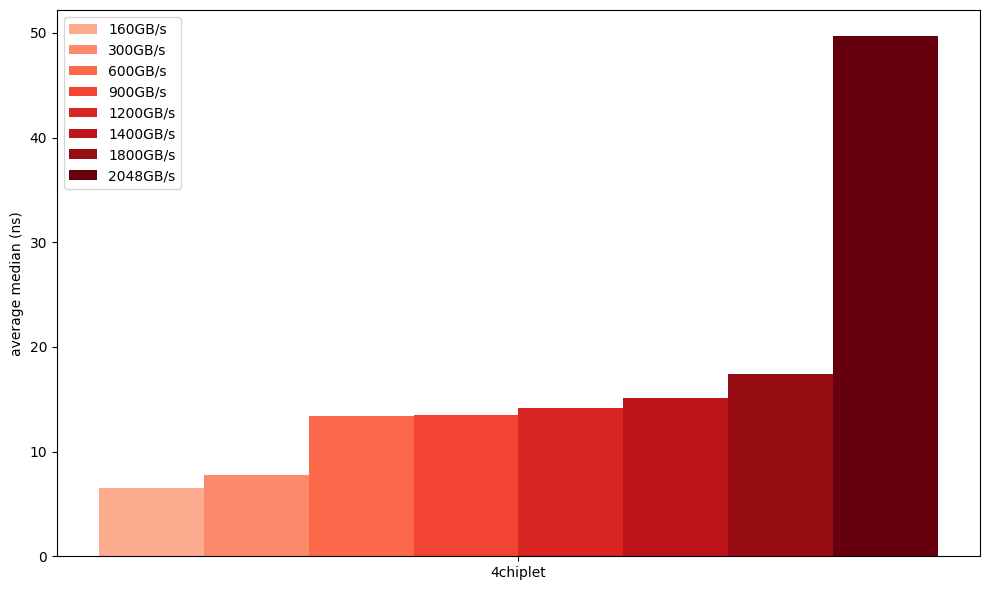

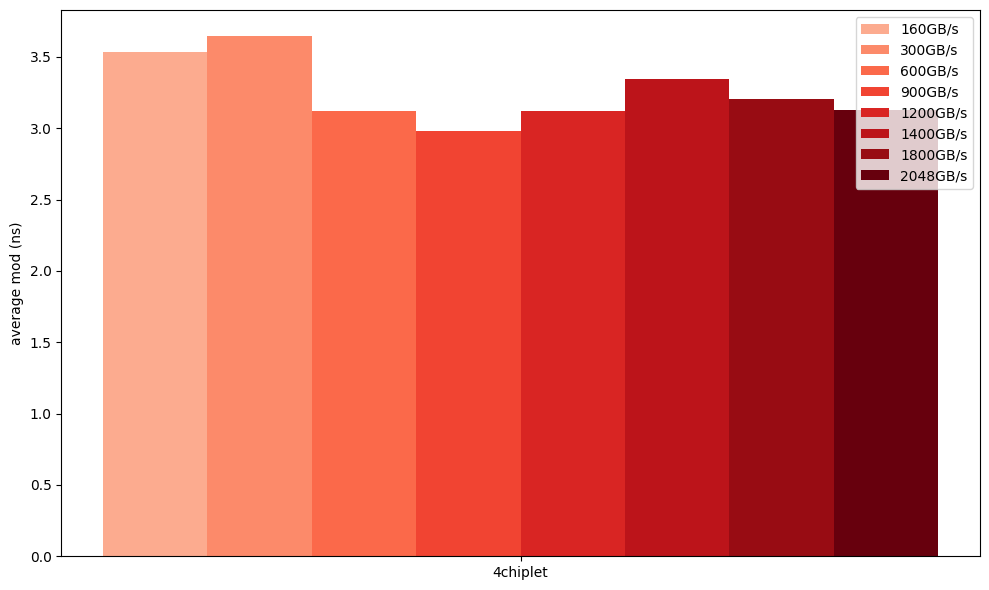

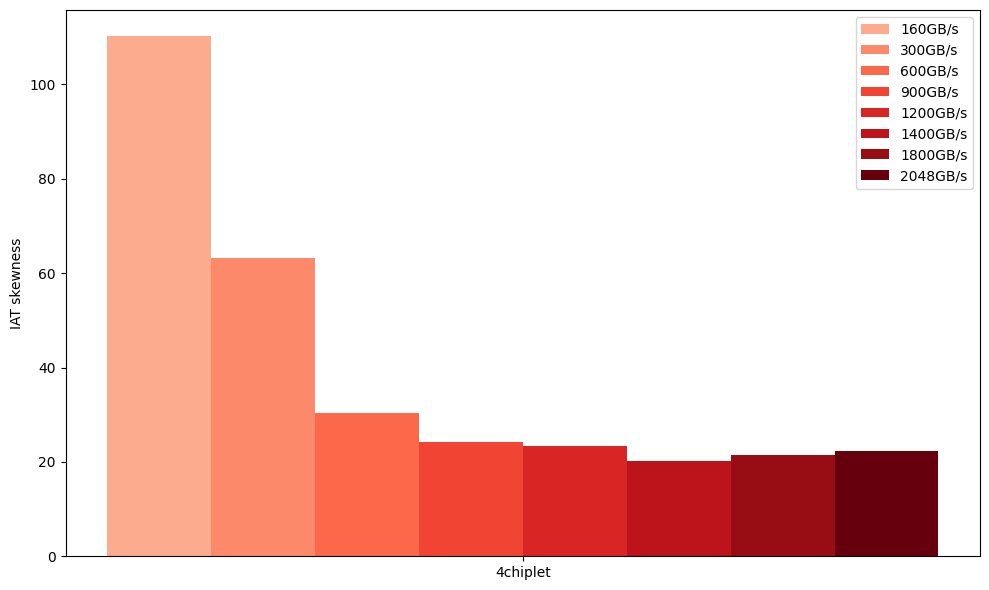

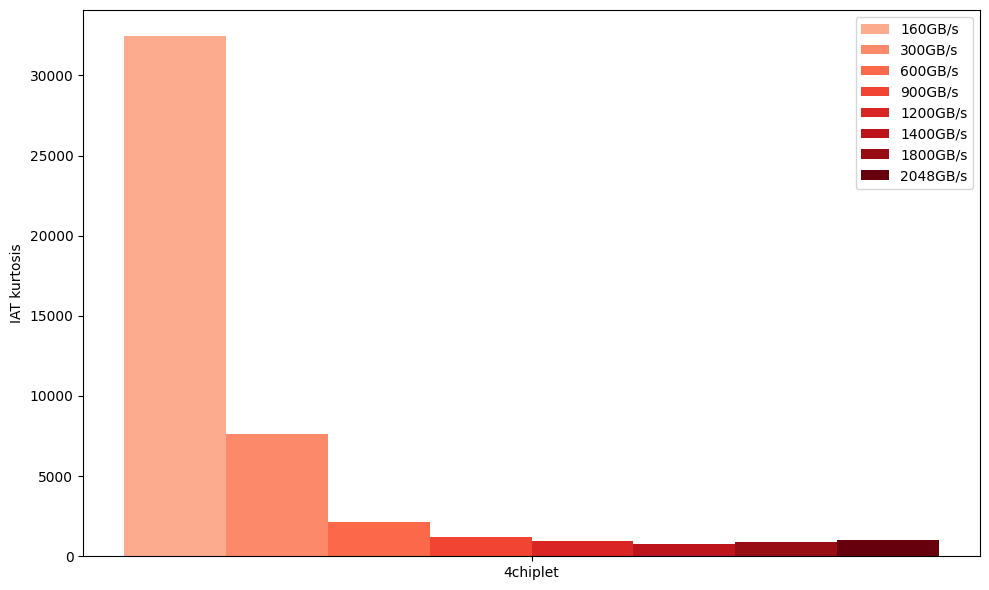

In [82]:
#--------------IAT------------------
iat_means = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['IAT_avg'], filtered_df['core cycle']) * 0.88
        iat_means.append({'chiplet': ch, 'bandwidth': bw, 'IAT': avg})
avg_iat = pd.DataFrame(iat_means)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
blues = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, blues)):
   values = avg_iat[avg_iat['bandwidth'] == bw]['IAT']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average inter arrival time (ns)")
plt.tight_layout()
plt.show()
plt.close()
#--------------STD------------------
iat_std = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['IAT_std'], filtered_df['core cycle']) * 0.88
        iat_std.append({'chiplet': ch, 'bandwidth': bw, 'IAT': avg})
std_iat = pd.DataFrame(iat_std)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = std_iat[std_iat['bandwidth'] == bw]['IAT']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average IAT standard deviation (ns)")
plt.tight_layout()
plt.show()
plt.close()
#--------------COV------------------
iat_cov = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['IAT_cov'], filtered_df['core cycle'])
        iat_cov.append({'chiplet': ch, 'bandwidth': bw, 'IAT': avg})
cov_iat = pd.DataFrame(iat_cov)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = cov_iat[cov_iat['bandwidth'] == bw]['IAT']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend()
plt.ylabel("average coefficient of variation")
plt.tight_layout()
plt.show()
plt.close()
#--------------median------------------
iat_med = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['IAT_med'], filtered_df['core cycle']) * 0.88
        iat_med.append({'chiplet': ch, 'bandwidth': bw, 'IAT': avg})
med_iat = pd.DataFrame(iat_med)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = med_iat[med_iat['bandwidth'] == bw]['IAT']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend()
plt.ylabel("average median (ns)")
plt.tight_layout()
plt.show()
plt.close()
#--------------mod------------------
iat_mod = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['IAT_mod'], filtered_df['core cycle']) * 0.88
        iat_mod.append({'chiplet': ch, 'bandwidth': bw, 'IAT': avg})
mod_iat = pd.DataFrame(iat_mod)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = mod_iat[mod_iat['bandwidth'] == bw]['IAT']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend()
plt.ylabel("average mod (ns)")
plt.tight_layout()
plt.show()
plt.close()
#--------------skewness------------------
iat_skw = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['IAT_skw'], filtered_df['core cycle'])
        iat_skw.append({'chiplet': ch, 'bandwidth': bw, 'IAT': avg})
skw_iat = pd.DataFrame(iat_skw)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = skw_iat[skw_iat['bandwidth'] == bw]['IAT']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend()
plt.ylabel("IAT skewness")
plt.tight_layout()
plt.show()
plt.close()
#--------------kurtosis------------------
iat_kur = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['IAT_kur'], filtered_df['core cycle'])
        iat_kur.append({'chiplet': ch, 'bandwidth': bw, 'IAT': avg})
kur_iat = pd.DataFrame(iat_kur)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = kur_iat[kur_iat['bandwidth'] == bw]['IAT']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend()
plt.ylabel("IAT kurtosis")
plt.tight_layout()
plt.show()
plt.close()

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns
from hurst import compute_Hc
from statsmodels.tsa.stattools import acf

for suite in ['SDK']: #suites:
    for bench in ['conjugate-gradient']: #suites[suite].keys():
        for kernel in [2]: #suites[suite][bench]:
            for ch in chiplets:
                for nv in ['NVLink1']: #Bandwidth:
                    data_path = "bench/" + suite + "/" + bench + "/ring/" + nv + "/" + str(ch) + "chiplet" + "/" + str(kernel)
                    iat_seq = pd.read_csv(data_path + '/' + 'iat_' + str(kernel) + '.csv', header=None).values.flatten()
                    #-------------ACF----------------------
                    seq = np.array(iat_seq[:-1])                          # ACF(1) > 0.8: Strong periodicity and persistence.
                    mean = np.mean(iat_seq[:-1])                          # ACF(1) 0.4–0.8: Moderate correlation, possible patterns.
                    num = np.sum((seq[:-1] - mean) * (seq[1:] - mean))    # ACF(1) < 0.4: Weak correlation, closer to random noise.
                    denom = np.sum((seq - mean) ** 2)
                    print(f"ACF: {num / denom}")
                    #-----------------Hurst------------------
                    H, c, data = compute_Hc(iat_seq[:-1], kind='random_walk', simplified=True)
                    print(f"Hurst Exponent: {H}")
                    #----------Box Plot--------------------                    
                    #plt.figure(figsize=(12, 8))
                    #sns.boxplot(data=[iat_seq], orient="h")
                    #plt.yticks([0], ["IAT"])
                    #plt.xscale("log")
                    #plt.xlabel("Inter Arrival Time (cycle)")
                    #plt.show()
                    #plt.close()

ACF: 0.002993209316753375
Hurst Exponent: 0.45745198361770867


## Analysis of burst volume

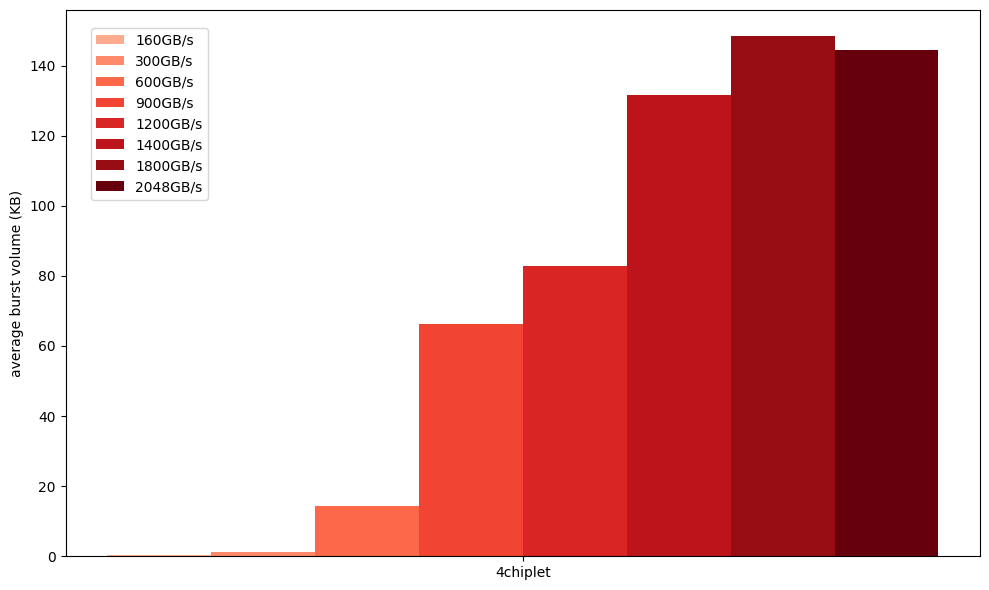

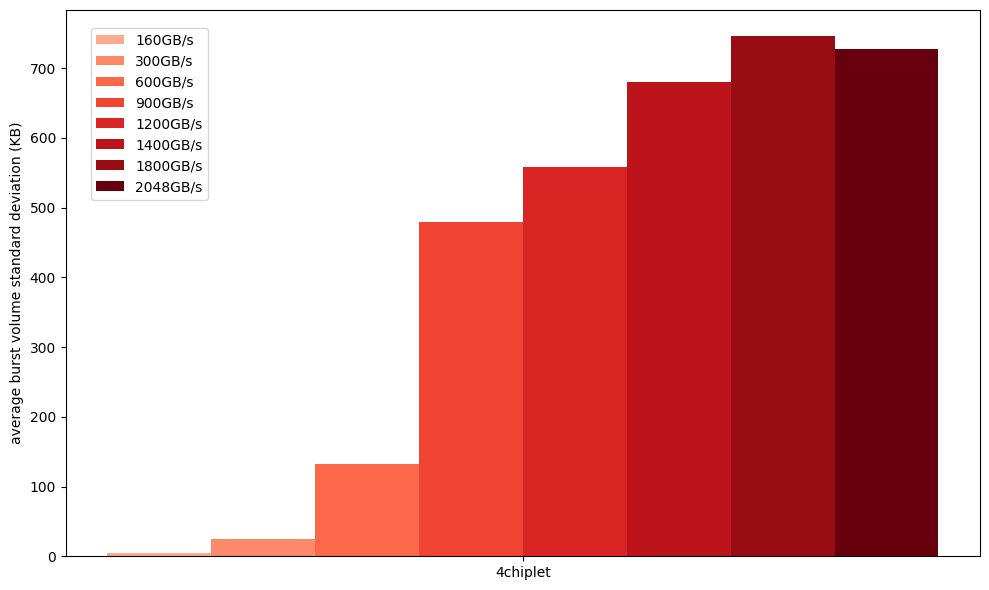

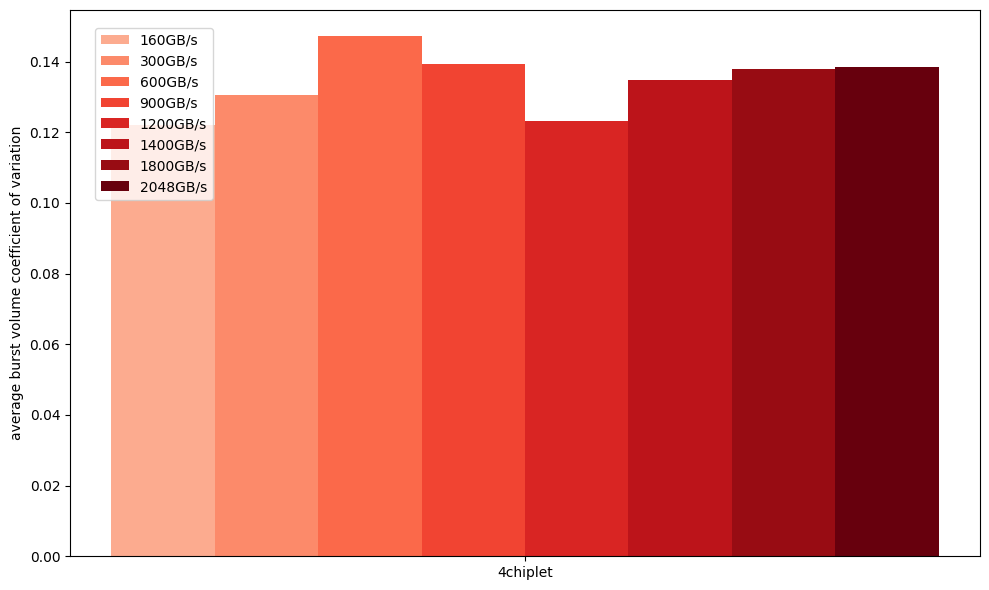

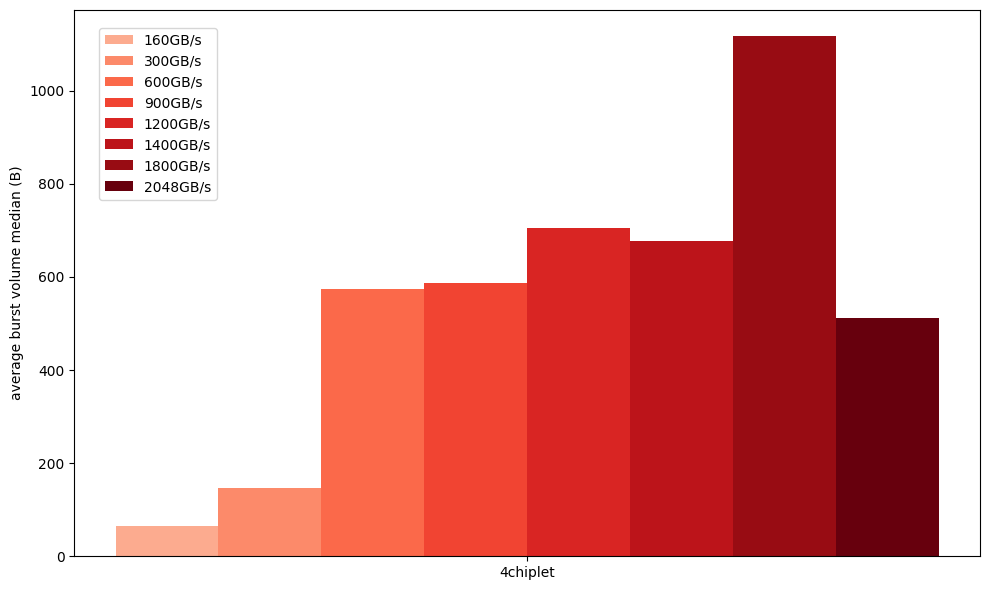

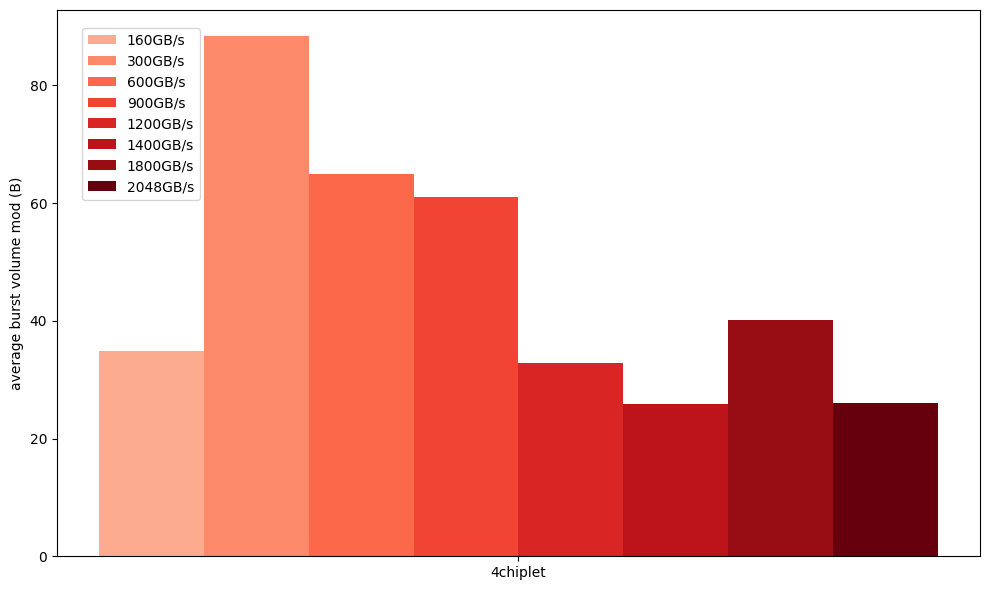

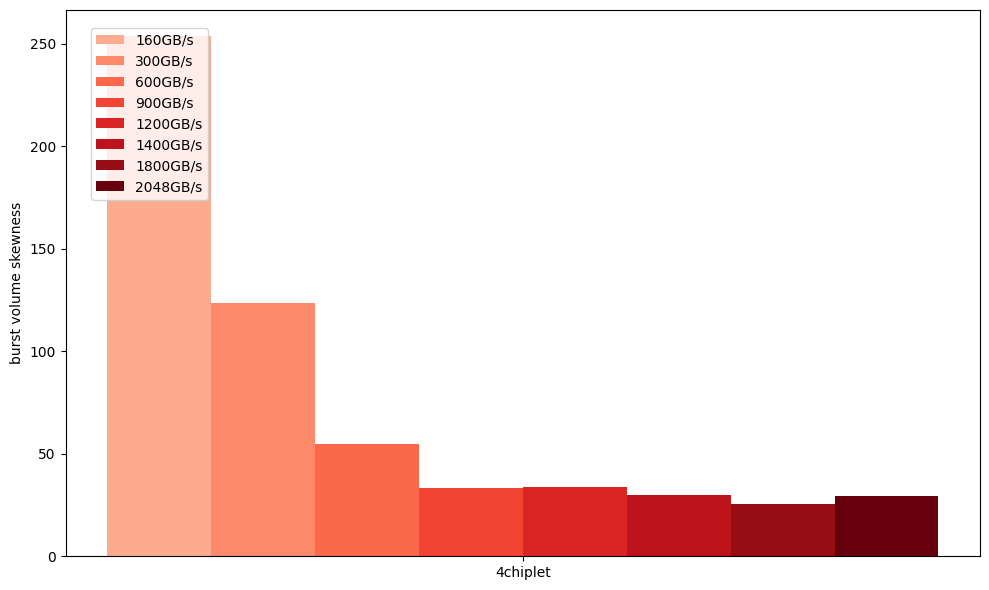

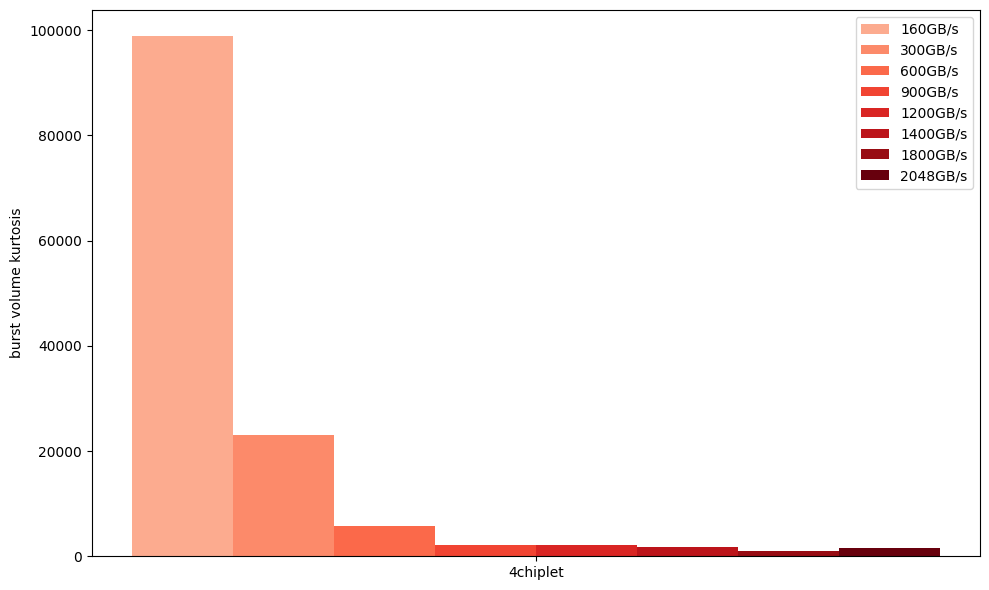

In [70]:
#--------------avg------------------
bv_means = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['VOL_avg'], filtered_df['core cycle'])/1000
        iat_means.append({'chiplet': ch, 'bandwidth': bw, 'VOL': avg})
avg_iat = pd.DataFrame(iat_means)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = avg_iat[avg_iat['bandwidth'] == bw]['VOL']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average burst volume (KB)")
plt.tight_layout()
plt.show()
#--------------STD------------------
bv_std = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['VOL_std'], filtered_df['core cycle'])/1000
        bv_std.append({'chiplet': ch, 'bandwidth': bw, 'VOL': avg})
std_bv = pd.DataFrame(bv_std)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = std_bv[std_bv['bandwidth'] == bw]['VOL']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average burst volume standard deviation (KB)")
plt.tight_layout()
plt.show()
plt.close()
#--------------COV------------------
bv_cov = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['VOL_cov'], filtered_df['core cycle'])
        bv_cov.append({'chiplet': ch, 'bandwidth': bw, 'VOL': avg})
cov_bv = pd.DataFrame(bv_cov)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = cov_bv[cov_bv['bandwidth'] == bw]['VOL']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average burst volume coefficient of variation")
plt.tight_layout()
plt.show()
plt.close()
#--------------median------------------
bv_med = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['VOL_med'], filtered_df['core cycle'])
        bv_med.append({'chiplet': ch, 'bandwidth': bw, 'VOL': avg})
med_bv = pd.DataFrame(bv_med)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = med_bv[med_bv['bandwidth'] == bw]['VOL']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average burst volume median (B)")
plt.tight_layout()
plt.show()
plt.close()
#--------------mod------------------
bv_mod = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['VOL_mod'], filtered_df['core cycle'])
        bv_mod.append({'chiplet': ch, 'bandwidth': bw, 'VOL': avg})
mod_bv = pd.DataFrame(bv_mod)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = mod_bv[mod_bv['bandwidth'] == bw]['VOL']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average burst volume mod (B)")
plt.tight_layout()
plt.show()
plt.close()
#--------------skewness------------------
bv_skw = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['VOL_skw'], filtered_df['core cycle'])
        bv_skw.append({'chiplet': ch, 'bandwidth': bw, 'VOL': avg})
skw_bv = pd.DataFrame(bv_skw)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = skw_bv[skw_bv['bandwidth'] == bw]['VOL']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("burst volume skewness")
plt.tight_layout()
plt.show()
plt.close()
#--------------kurtosis------------------
bv_kur = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['VOL_kur'], filtered_df['core cycle'])
        bv_kur.append({'chiplet': ch, 'bandwidth': bw, 'VOL': avg})
kur_bv = pd.DataFrame(bv_kur)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = kur_bv[kur_bv['bandwidth'] == bw]['VOL']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend()
plt.ylabel("burst volume kurtosis")
plt.tight_layout()
plt.show()
plt.close()

## Analysis of burst length (burst duration)

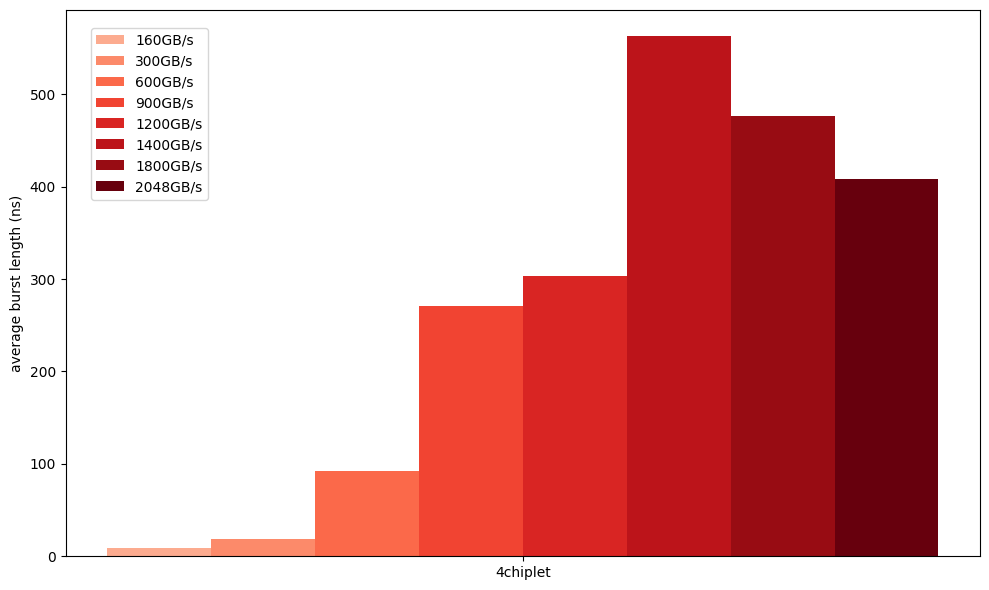

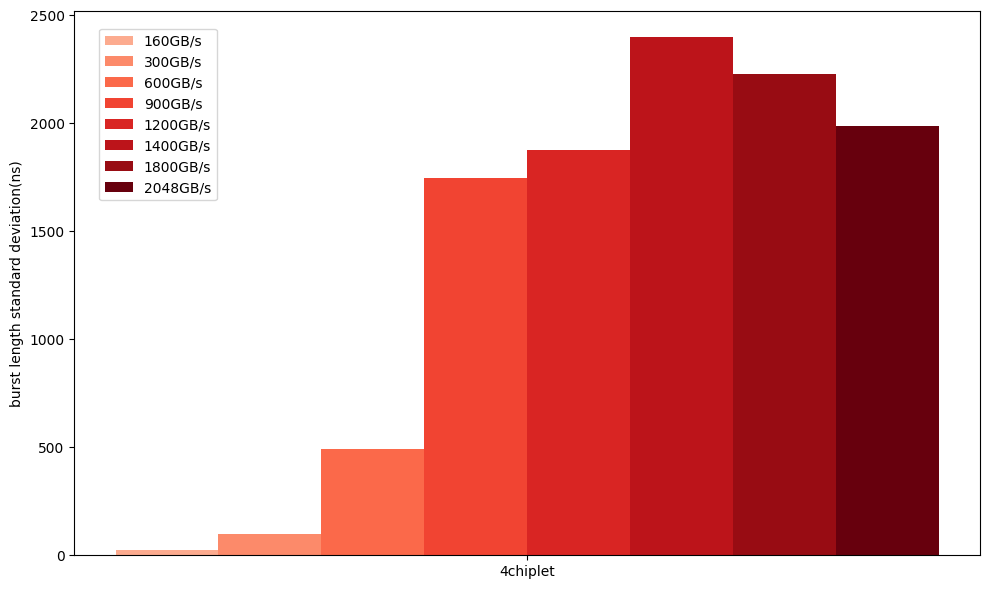

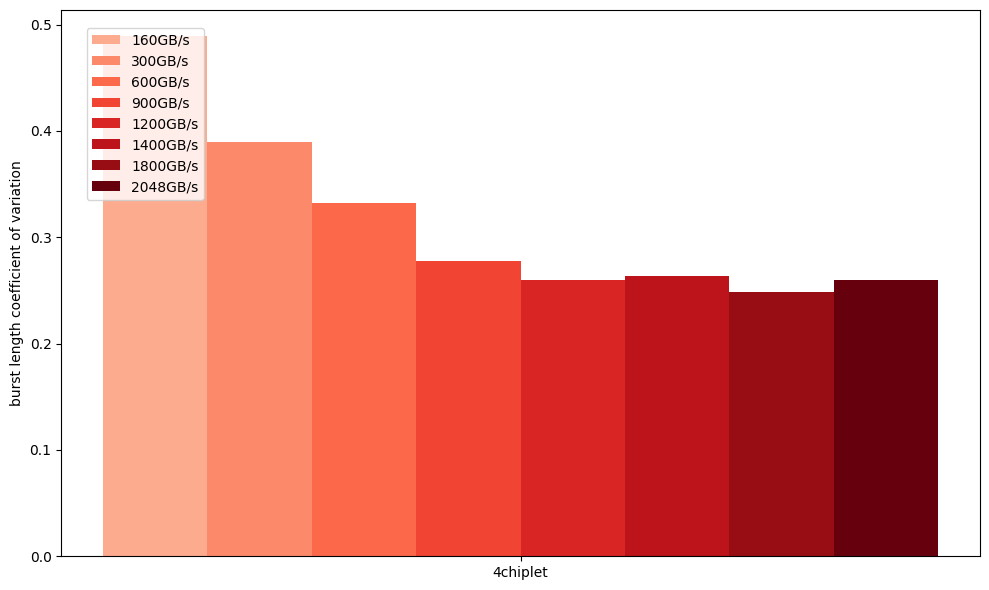

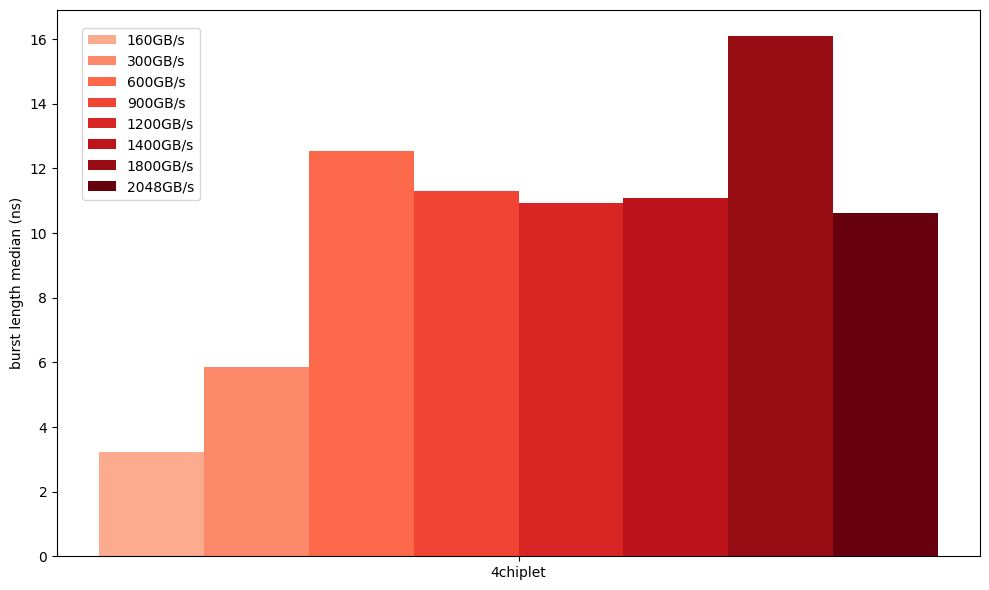

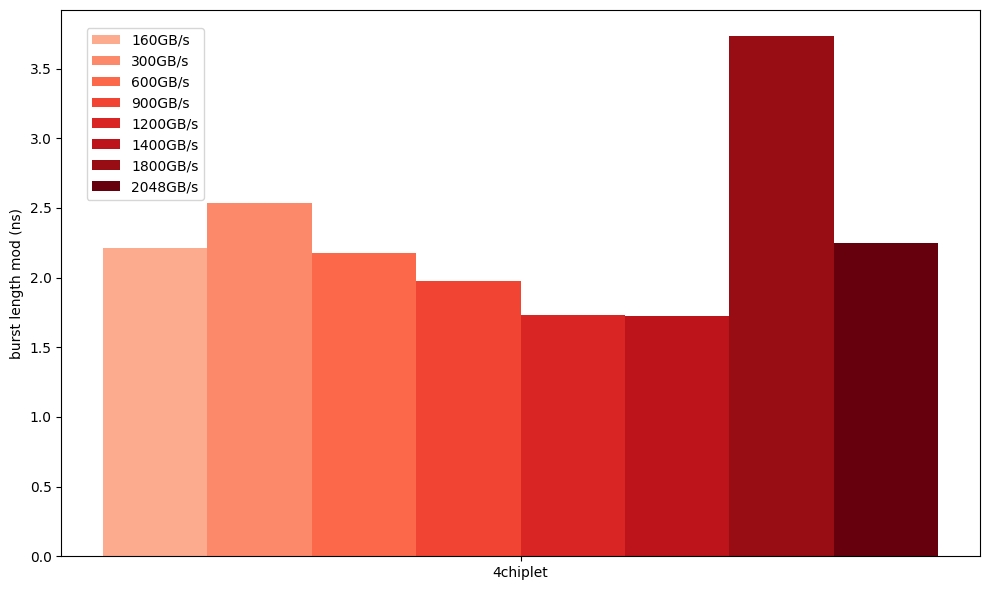

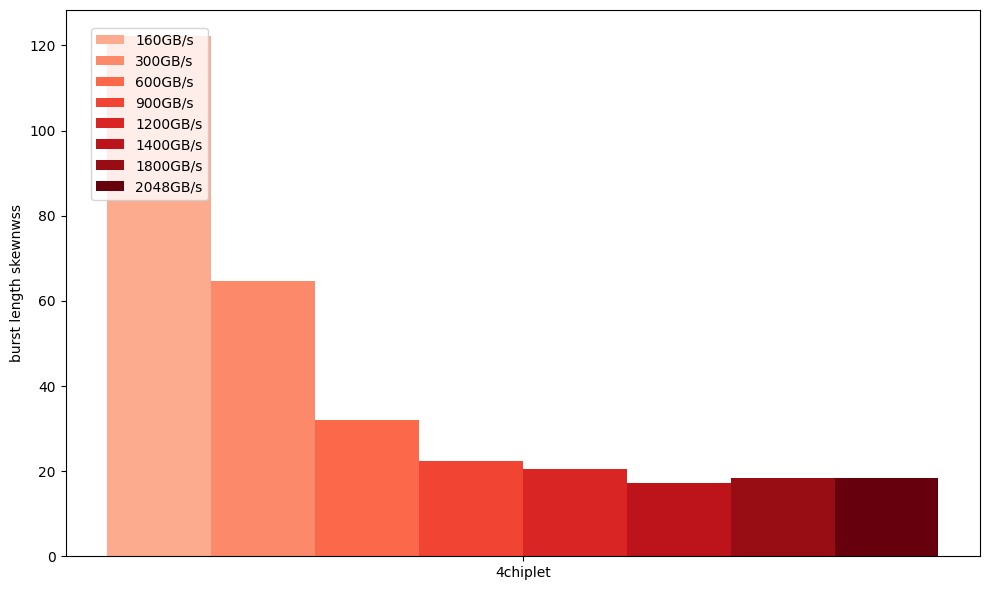

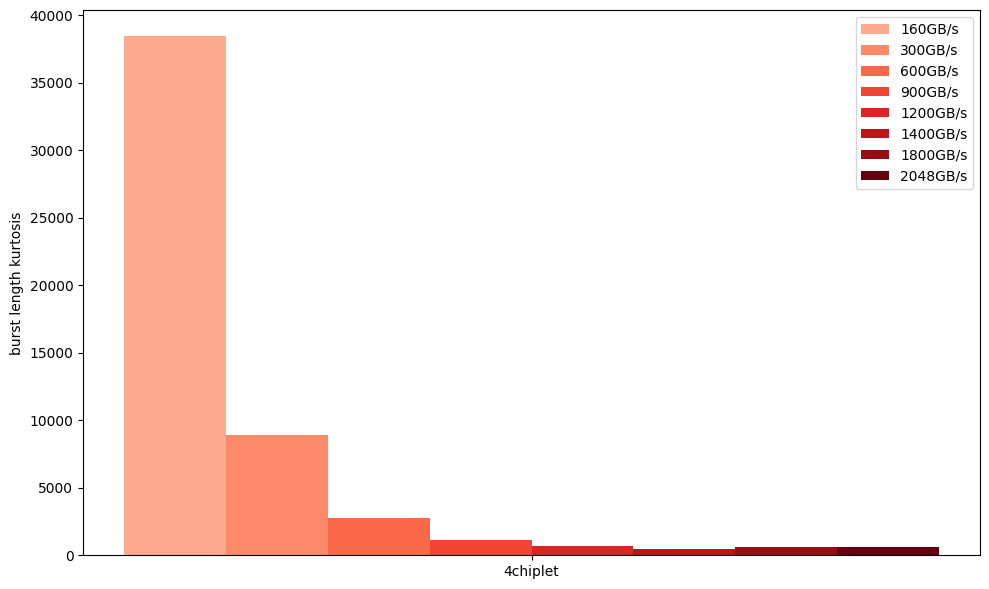

In [71]:
#---------------avg-----------------
bl_means = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['LEN_avg'], filtered_df['core cycle']) / 0.88
        bl_means.append({'chiplet': ch, 'bandwidth': bw, 'LEN': avg})
means_bl = pd.DataFrame(bl_means)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = means_bl[means_bl['bandwidth'] == bw]['LEN']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("average burst length (ns)")
plt.tight_layout()
plt.show()
plt.close()
#---------------STD-----------------
bl_std = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['LEN_std'], filtered_df['core cycle']) / 0.88
        bl_std.append({'chiplet': ch, 'bandwidth': bw, 'LEN': avg})
std_bl = pd.DataFrame(bl_std)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = std_bl[std_bl['bandwidth'] == bw]['LEN']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("burst length standard deviation(ns)")
plt.tight_layout()
plt.show()
plt.close()
#---------------COV-----------------
bl_cov = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['LEN_cov'], filtered_df['core cycle']) / 0.88
        bl_cov.append({'chiplet': ch, 'bandwidth': bw, 'LEN': avg})
cov_bl = pd.DataFrame(bl_cov)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = cov_bl[cov_bl['bandwidth'] == bw]['LEN']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("burst length coefficient of variation")
plt.tight_layout()
plt.show()
plt.close()
#--------------median-----------------
bl_med = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['LEN_med'], filtered_df['core cycle']) / 0.88
        bl_med.append({'chiplet': ch, 'bandwidth': bw, 'LEN': avg})
med_bl = pd.DataFrame(bl_med)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = med_bl[med_bl['bandwidth'] == bw]['LEN']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("burst length median (ns)")
plt.tight_layout()
plt.show()
plt.close()
#--------------mod-----------------
bl_mod = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['LEN_mod'], filtered_df['core cycle']) / 0.88
        bl_mod.append({'chiplet': ch, 'bandwidth': bw, 'LEN': avg})
mod_bl = pd.DataFrame(bl_mod)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = mod_bl[mod_bl['bandwidth'] == bw]['LEN']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("burst length mod (ns)")
plt.tight_layout()
plt.show()
plt.close()
#--------------skewnwss-----------------
bl_skw = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['LEN_skw'], filtered_df['core cycle'])
        bl_skw.append({'chiplet': ch, 'bandwidth': bw, 'LEN': avg})
skw_bl = pd.DataFrame(bl_skw)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = skw_bl[skw_bl['bandwidth'] == bw]['LEN']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend(loc='upper left', bbox_to_anchor=(0.02, 0.98))
plt.ylabel("burst length skewnwss")
plt.tight_layout()
plt.show()
plt.close()
#--------------kurtosis-----------------
bl_kur = []
for ch in chiplets:
    for bw in Bandwidth:
        filtered_df = df[(df['chiplet'] == ch) & (df['bandwidth'] == bw)].dropna()
        avg = weighted_arithmetic_mean(filtered_df['LEN_kur'], filtered_df['core cycle'])
        bl_kur.append({'chiplet': ch, 'bandwidth': bw, 'LEN': avg})
kur_bl = pd.DataFrame(bl_kur)

plt.figure(figsize=(10, 6))
x = np.arange(len(chiplets))
width = 0.8 / len(Bandwidth)
reds = plt.cm.Reds(np.linspace(0.3, 1, 8))
for i, (bw, color) in enumerate(zip(Bandwidth, reds)):
   values = kur_bl[kur_bl['bandwidth'] == bw]['LEN']
   position = x + (i - 4 + 0.5) * width
   plt.bar(position, values, width, label=bw, color=color)
plt.xticks(x, ['4chiplet'])
plt.legend()
plt.ylabel("burst length kurtosis")
plt.tight_layout()
plt.show()
plt.close()

## Analysis of burst intensity (hurst)

In [52]:
from hurst import compute_Hc
results = []

for suite in suites:
    for bench in suites[suite].keys():
        for kernel in suites[suite][bench]:
            for ch in chiplets:
                for bw in ['NVLink1']: #Bandwidth:
                    data_path = "bench/" + suite + "/" + bench + "/ring/" + bw + "/" + str(ch) + "chiplet" + "/" + str(kernel) + "/"
                    int_seq = pd.read_csv(data_path + 'burst-ratio_' + str(kernel) + '.csv', header=None).values.flatten()
                    if len(int_seq) > 100:
                        #-------------ACF----------------------
                        seq = np.array(int_seq[:-1])                          # ACF(1) > 0.8: Strong periodicity and persistence.
                        mean = np.mean(int_seq[:-1])                          # ACF(1) 0.4–0.8: Moderate correlation, possible patterns.
                        num = np.sum((seq[:-1] - mean) * (seq[1:] - mean))    # ACF(1) < 0.4: Weak correlation, closer to random noise.
                        denom = np.sum((seq - mean) ** 2)
                        ACF = num / denom
                        #-----------------Hurst------------------
                        H, _, _ = compute_Hc(int_seq[:-1], kind='random_walk', simplified=True)
                        results.append({"suite": suite, "benchmark": bench, "kernel": kernel, "chiplet": ch, "bandwidth": bw, "ACF(1)": round(ACF, 3), "Hurst": round(H, 3)})
df = pd.DataFrame(results, columns=["suite", "benchmark", "kernel", "chiplet", "bandwidth", "ACF(1)", "Hurst"])
df.to_csv('results/range_dependency_analysis.csv', index=False)

## anlysis of burst (BV, BL)

### burst decomposition

In [39]:
for suite in suites:
    for bench in suites[suite].keys():
        for kernel in suites[suite][bench]:
            for ch in chiplets:
                for nv in Bandwidth:
                    data_path = "bench/" + suite + "/" + bench + "/ring/" + nv + "/" + str(ch) + "chiplet" + "/" + str(kernel) + "/"
                    burst_vol = pd.read_csv(data_path + 'burst-vol_' + str(kernel) + '.csv', header=None).values.flatten()
                    burst_dur = pd.read_csv(data_path + 'burst-dur_' + str(kernel) + '.csv', header=None).values.flatten()
                    min_len = min(len(burst_vol), len(burst_dur))
                    burst_vol = burst_vol[:min_len]
                    burst_dur = burst_dur[:min_len]
                    
                    # Create tuples (X, Y)
                    burst_points = list(zip(burst_vol, burst_dur))
                    
                    burst_dur_pdf = {}
                    burst_vol_pdf = {}
                    for item in burst_vol:
                        if item not in burst_vol_pdf.keys():
                            burst_vol_pdf[item] = 1
                        else:
                            burst_vol_pdf[item] += 1

                    for item in burst_dur:
                        if item not in burst_dur_pdf.keys():
                            burst_dur_pdf[item] = 1
                        else:
                            burst_dur_pdf[item] += 1
                    for k, v in burst_vol_pdf.items():
                        v = v / sum(burst_vol_pdf.keys())
                    for k,v in burst_dur_pdf.items():
                        v = v / sum(burst_dur_pdf.keys())
                    burst_vol_pdf = dict(sorted(burst_vol_pdf.items(), key=lambda x: x[0]))
                    burst_dur_pdf = dict(sorted(burst_dur_pdf.items(), key=lambda x: x[0]))
                    # Plot scatter figure
                    fig = plt.figure(figsize=(8, 8))
                    grid = plt.GridSpec(4, 4)
                    ax_scatter = fig.add_subplot(grid[1:4, 0:3])
                    ax_density_y  = fig.add_subplot(grid[0, 0: 3])
                    ax_density_x  = fig.add_subplot(grid[1: 4, 3])
                    ax_scatter.scatter(burst_vol, burst_dur, color='blue', alpha=0.6, edgecolors='k')
                    ax_scatter.set_xscale("log")
                    ax_scatter.set_yscale("log")
                    ax_scatter.set_xlabel('Burst Volume (B)')
                    ax_scatter.set_ylabel('Burst Length (cycle)')
                    # Density plots
                    ax_density_x.plot(burst_dur_pdf.keys(), burst_dur_pdf.values(), "b-o")
                    ax_density_y.plot(burst_vol_pdf.keys(), burst_vol_pdf.values(), "b-o")
                    ax_density_y.set_xticks([])
                    ax_density_y.set_yticks([])
                    ax_density_x.set_yticks([])
                    ax_density_x.set_xticks([])
                    if not os.path.exists("results/benchmarks/" + suite + "/" + bench + "/" + nv + "/" + str(ch) + "chiplet/"):
                        os.makedirs("results/benchmarks/" + suite + "/" + bench + "/" + nv + "/" + str(ch) + "chiplet/")
                    plt.savefig("results/benchmarks/" + suite + "/" + bench + "/" + nv + "/" + str(ch) + "chiplet/" + "burst_decomposition_kernel_" + str(kernel) + ".png")
                    plt.tight_layout()
                    plt.close()

### burst fraction

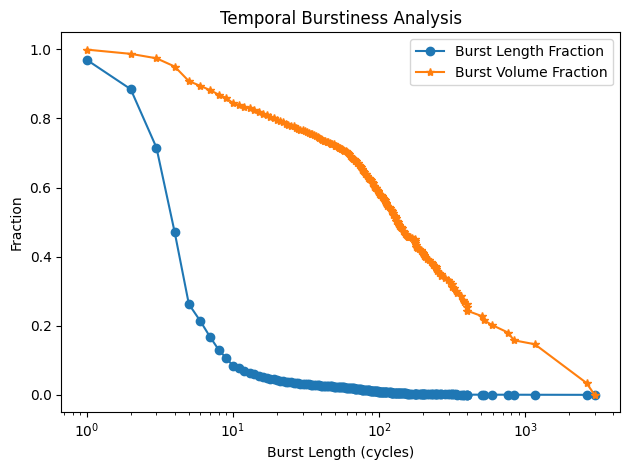

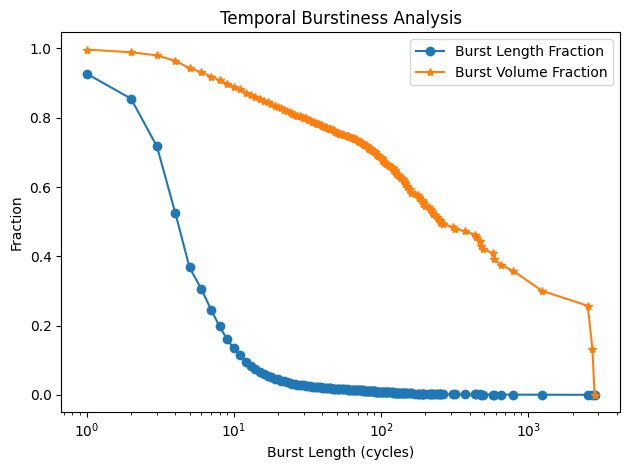

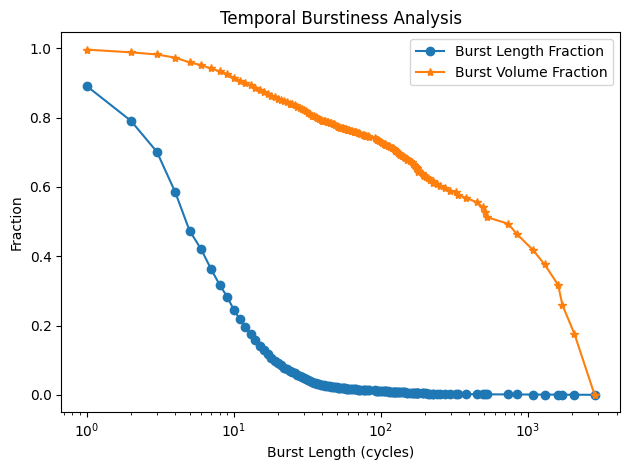

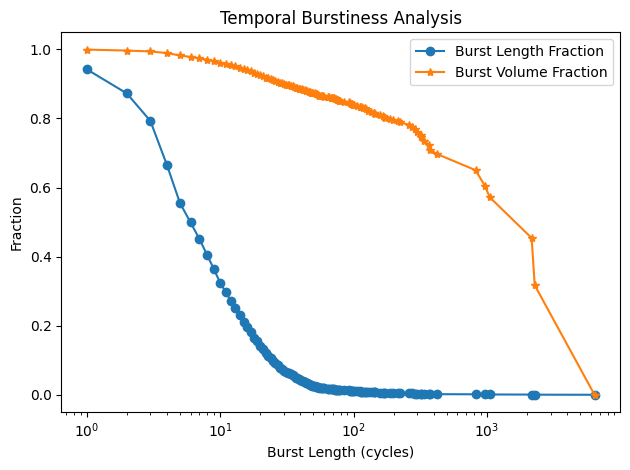

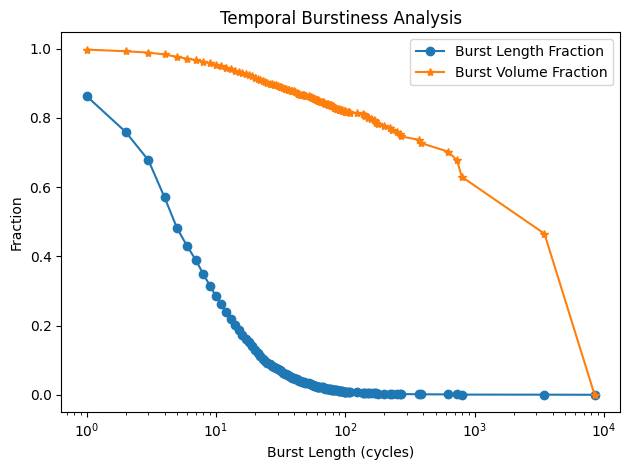

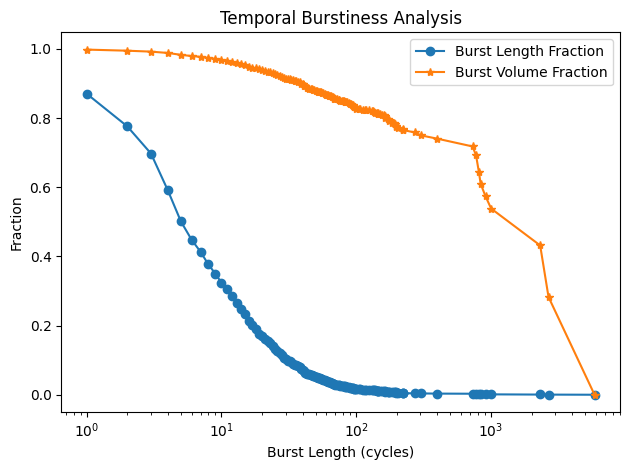

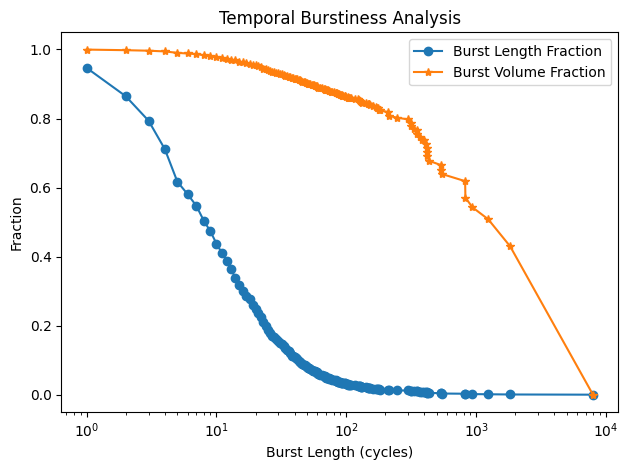

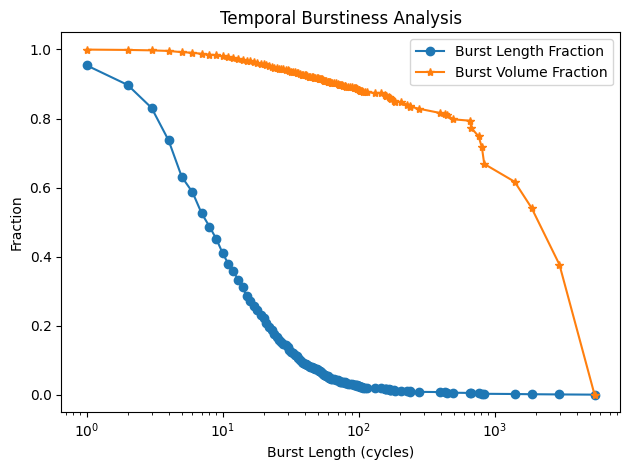

In [40]:
for suite in ['SDK']: #suites:
    for bench in ['conjugate-gradient']: #suites[suite].keys():
        for kernel in [2]: #suites[suite][bench]:
            for ch in chiplets:
                for nv in NVLinks:
                    data_path = "bench/" + suite + "/" + bench + "/ring/" + nv + "/" + str(ch) + "chiplet" + "/" + str(kernel) + "/"
                    burst_vol = pd.read_csv(data_path + 'burst-vol_' + str(kernel) + '.csv', header=None).values.flatten()
                    burst_dur = pd.read_csv(data_path + 'burst-dur_' + str(kernel) + '.csv', header=None).values.flatten()
                    min_len = min(len(burst_vol), len(burst_dur))
                    burst_vol = burst_vol[:min_len]
                    burst_dur = burst_dur[:min_len]
                    burst_length_dist = {}
                    burst_amount_dist = {}
                    burst_length_value = {}
                
                    # Calculate distributions
                    for length, volume in zip(burst_dur, burst_vol):
                        burst_length_dist[length] = burst_length_dist.get(length, 0) + 1
                        burst_amount_dist[volume] = burst_amount_dist.get(volume, 0) + 1
                        burst_length_value[length] = burst_length_value.get(length, 0) + volume
                
                    # Sort distributions
                    burst_length_dist = dict(sorted(burst_length_dist.items()))
                    burst_amount_dist = dict(sorted(burst_amount_dist.items()))
                    burst_length_value = dict(sorted(burst_length_value.items()))
                
                    # Calculate PDF and CDF
                    burst_length_pdf = {k: v / sum(burst_length_dist.values()) for k, v in burst_length_dist.items()}
                    burst_amount_pdf = {k: v / sum(burst_amount_dist.values()) for k, v in burst_amount_dist.items()}
                
                    burst_length_cdf = np.cumsum(list(burst_length_dist.values())) / sum(burst_length_dist.values())
                    burst_length_ccdf = 1 - burst_length_cdf
                
                    burst_amount_cdf = np.cumsum(list(burst_length_value.values())) / sum(burst_length_value.values())
                    burst_amount_ccdf = 1 - burst_amount_cdf
                
                    # Plot CCDF
                    plt.figure()
                    plt.plot(list(burst_length_dist.keys()), burst_length_ccdf, marker="o", label="Burst Length Fraction")
                    plt.plot(list(burst_length_value.keys()), burst_amount_ccdf, marker="*", label="Burst Volume Fraction")
                    plt.xscale("log")
                    plt.xlabel("Burst Length (cycles)")
                    plt.ylabel("Fraction")
                    plt.title("Temporal Burstiness Analysis")
                    plt.legend()
                    plt.tight_layout()
                    plt.savefig("results/benchmarks/" + suite + "/" + bench + "/" + nv + "/" + str(ch) + "chiplet/" + "burst_fraction_kernel_" + str(kernel) + ".png")
                    plt.close()

## three dimension analysis (IAT, BV, BL)

In [56]:
data = []
for suite in suites:
    for bench in suites[suite].keys():
        for kernel in suites[suite][bench]:
            for ch in chiplets:
                for bw in NVLinks:
                    data_path = "bench/" + suite + "/" + bench + "/ring/" + bw + "/" + str(ch) + "chiplet" + "/" + str(kernel) + "/"
                    iat_seq = pd.read_csv(data_path + 'iat_' + str(kernel) + '.csv', header=None).values.flatten()
                    int_seq = pd.read_csv(data_path + 'burst-ratio_' + str(kernel) + '.csv', header=None).values.flatten()
                    if len(int_seq) > 100 and len(iat_seq) > 100:
                        seq = np.array(int_seq[:-1])                          # ACF(1) > 0.8: Strong periodicity and persistence.
                        mean = np.mean(int_seq[:-1])                          # ACF(1) 0.4–0.8: Moderate correlation, possible patterns.
                        num = np.sum((seq[:-1] - mean) * (seq[1:] - mean))    # ACF(1) < 0.4: Weak correlation, closer to random noise.
                        denom = np.sum((seq - mean) ** 2)
                        ACF_burst = num / denom
                        H_burst, _, _ = compute_Hc(int_seq[:-1], kind='random_walk', simplified=True)
                        seq = np.array(iat_seq[:-1])                          # ACF(1) > 0.8: Strong periodicity and persistence.
                        mean = np.mean(iat_seq[:-1])                          # ACF(1) 0.4–0.8: Moderate correlation, possible patterns.
                        num = np.sum((seq[:-1] - mean) * (seq[1:] - mean))    # ACF(1) < 0.4: Weak correlation, closer to random noise.
                        denom = np.sum((seq - mean) ** 2)
                        ACF_iat = num / denom
                        H_iat, _, _ = compute_Hc(iat_seq[:-1], kind='random_walk', simplified=True)
                        data.append([ACF_burst, H_burst, ACF_iat, H_burst])
classification_data = pd.DataFrame(data, columns=['ACF_burst', 'hurst_burst', 'ACF_iat', 'hurst_iat'])
classification_data.head()

,ACF_burst,hurst_burst,ACF_iat,hurst_iat
0,0.805329,0.359229,0.002993,0.359229
1,0.804915,0.397555,0.006424,0.397555
2,0.736826,0.382043,0.285344,0.382043
3,0.743995,0.430527,0.183809,0.430527
4,0.708407,0.431406,0.028196,0.431406


In [61]:
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

X = classification_data[['ACF_burst', 'hurst_burst', 'ACF_iat', 'hurst_iat']]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
out_df = {}
# ------------ K-means Clustering ------------
kmeans = KMeans(n_clusters=3, random_state=42)
out_df['kmeans_label'] = kmeans.fit_predict(X_scaled)

# ------------ DBSCAN Clustering ------------
dbscan = DBSCAN(eps=0.5, min_samples=5)
out_df['dbscan_label'] = dbscan.fit_predict(X_scaled)

# ------------ GMM Clustering ------------
gmm = GaussianMixture(n_components=3, random_state=42)
out_df['gmm_label'] = gmm.fit_predict(X_scaled)

print(out_df)

{'kmeans_label': array([2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 2, 0, 2,
       2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0,
       2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 1, 1, 0, 2, 1, 0, 0,
       0, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 